Importem les llibreries neceasries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Carreguem el datset 

In [8]:
# 2. Carga del Dataset
# Cargar el archivo CSV
file_path = 'student-mat.csv'  
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Exploracio inicial del dataset


In [26]:
# Información del dataset (tipos de datos y valores nulos)
df.info()

# Diccionario para mapear valores categóricos binarios
bin_map = {
    'yes': 1, 'no': 0,
    'GP': 1, 'MS': 0,
    'F': 1, 'M': 0,
    'U': 1, 'R': 0,
    'LE3': 0, 'GT3': 1,
    'T': 1, 'A': 0
}

# Aplicar mapeo a las columnas relevantes
cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].map(bin_map)

# Limpiar valores no deseados en columnas categóricas
for col in df.columns:
    if df[col].dtype == 'object':  # Verificar si es tipo objeto (categórico)
        df[col] = df[col].str.replace("'", "").str.strip()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      0 non-null      float64
 1   sex         0 non-null      float64
 2   age         395 non-null    int64  
 3   address     0 non-null      float64
 4   famsize     0 non-null      float64
 5   Pstatus     0 non-null      float64
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   0 non-null      float64
 16  famsup      0 non-null      float64
 17  paid        0 non-null      float64
 18  activities  0 non-null      float64
 19  nursery     0 non-null      f

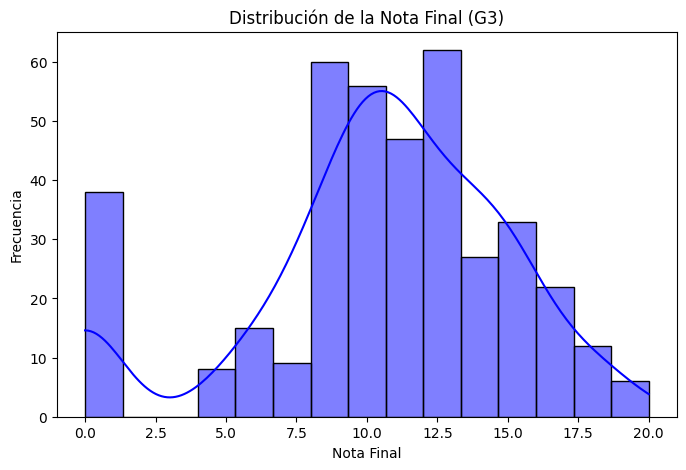

In [24]:
# Distribución de la variable objetivo (G3)
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], kde=True, bins=15, color='blue')
plt.title('Distribución de la Nota Final (G3)')
plt.xlabel('Nota Final')
plt.ylabel('Frecuencia')
plt.show()


Distribución bimodal con concentración principal en valores medios:

·La distribución no es perfectamente normal y parece presentar dos picos principales:
    - Uno alrededor de 0.
    -Otro entre 10 y 15.

·Esto sugiere que podría haber dos grupos distintos de estudiantes:
    Un grupo con muy bajo rendimiento (notas cercanas a 0).
    Otro grupo que logra un rendimiento promedio o superior (10 a 15).

·Presencia de estudiantes con notas extremas:
    Se observa una pequeña proporción de estudiantes con G3 entre 15 y 20, indicando un número reducido de estudiantes con rendimiento excepcional.
    Del mismo modo, hay un grupo considerable que tiene G3 = 0, lo que podría ser estudiantes que no aprobaron o no completaron el curso.

·Asimetría leve hacia las notas bajas:
    Aunque el centro principal de la distribución está entre 10-12, el segundo pico alrededor de 0 genera una asimetría hacia los valores bajos.
    Esto podría deberse a factores externos como dificultades académicas, problemas familiares, o falta de compromiso.

Posibles preguntas de análisis:
¿Por qué hay tantos estudiantes con G3 = 0?

¿Hay factores específicos, como las ausencias o los fracasos académicos, que estén correlacionados con este rendimiento extremadamente bajo?
¿Cuál es la relación entre los dos picos observados?

¿Existen características (por ejemplo, tiempo de estudio, apoyo familiar, o hábitos de consumo de alcohol) que separen a los estudiantes en estos dos grupos principales?
¿Cómo afecta esta distribución al modelo?

Dado que hay una concentración de valores en 0, es posible que esto afecte negativamente a los modelos , ya que podrían sobreajustarse a este valor.

Siguientes pasos sugeridos para el análisis de datos:
Separar a los estudiantes con G3 = 0:

Examina si este grupo tiene características únicas y decide si deben manejarse de manera especial (por ejemplo, tratarlos como un caso separado o eliminarlos en algunos análisis).
Investigar correlaciones con G3:

Determina qué variables están más relacionadas con las notas finales, especialmente para comprender la diferencia entre estudiantes de bajo y alto rendimiento.
Visualizar la relación entre variables clave y G3:

Usa gráficos como boxplots o scatterplots para entender cómo factores como absences, studytime, o failures influyen en G3.

In [29]:
# Separar estudiantes con G3 = 0
g3_zero = df[df['G3'] == 0]
g3_non_zero = df[df['G3'] != 0]

# Analizar estudiantes con G3 = 0
print("Número de estudiantes con G3 = 0:", len(g3_zero))
print(g3_zero.describe())

Número de estudiantes con G3 = 0: 38
       school  sex        age  address  famsize  Pstatus       Medu  \
count     0.0  0.0  38.000000      0.0      0.0      0.0  38.000000   
mean      NaN  NaN  17.078947      NaN      NaN      NaN   2.315789   
std       NaN  NaN   1.302421      NaN      NaN      NaN   1.016227   
min       NaN  NaN  15.000000      NaN      NaN      NaN   1.000000   
25%       NaN  NaN  16.000000      NaN      NaN      NaN   2.000000   
50%       NaN  NaN  17.000000      NaN      NaN      NaN   2.000000   
75%       NaN  NaN  18.000000      NaN      NaN      NaN   3.000000   
max       NaN  NaN  19.000000      NaN      NaN      NaN   4.000000   

            Fedu  traveltime  studytime  ...  romantic     famrel   freetime  \
count  38.000000   38.000000  38.000000  ...       0.0  38.000000  38.000000   
mean    2.289474    1.605263   1.973684  ...       NaN   3.842105   3.131579   
std     1.112773    0.789782   0.914946  ...       NaN   1.000711   0.875216   
min

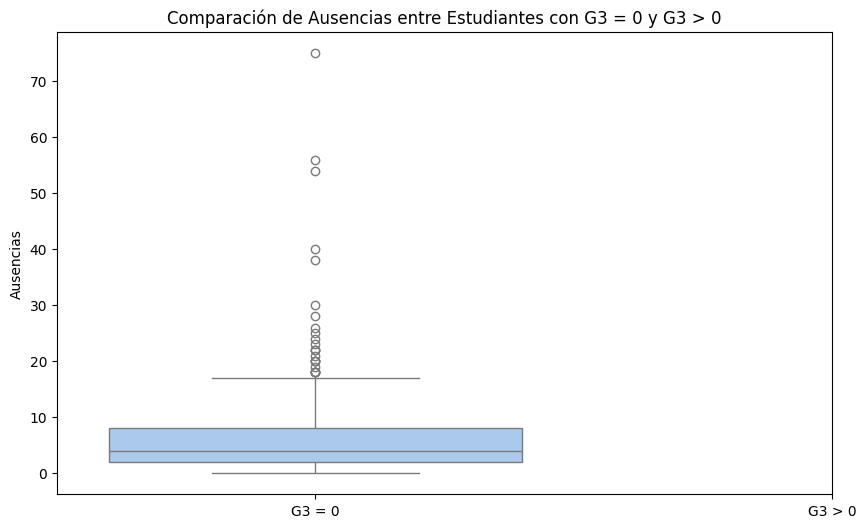

In [30]:
# Visualizar diferencias entre estudiantes con G3 = 0 y G3 > 0
plt.figure(figsize=(10, 6))
sns.boxplot(data=[g3_zero['absences'], g3_non_zero['absences']], palette='pastel')
plt.xticks([0, 1], ['G3 = 0', 'G3 > 0'])
plt.title('Comparación de Ausencias entre Estudiantes con G3 = 0 y G3 > 0')
plt.ylabel('Ausencias')
plt.show()

Los estudiantes con G3 > 0 presentan una mayor variabilidad en las ausencias. Algunos incluso tienen valores extremos (más de 30 o 40 ausencias), mientras que los estudiantes con G3 = 0 tienen 0 ausencias.
Esto indica que las ausencias por sí solas no son un predictor fuerte de G3 = 0, ya que los estudiantes con bajo rendimiento no parecen faltar a clase, pero podrían estar enfrentando otros problemas (falta de estudio, bajas calificaciones previas, etc.).
Los valores extremos en el grupo G3 > 0 sugieren que algunos estudiantes con muchas ausencias logran aprobar, lo que podría relacionarse con otros factores como la calidad del tiempo de estudio.

/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_23368/2667571711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failures', y='G3', data=df, palette='pastel')


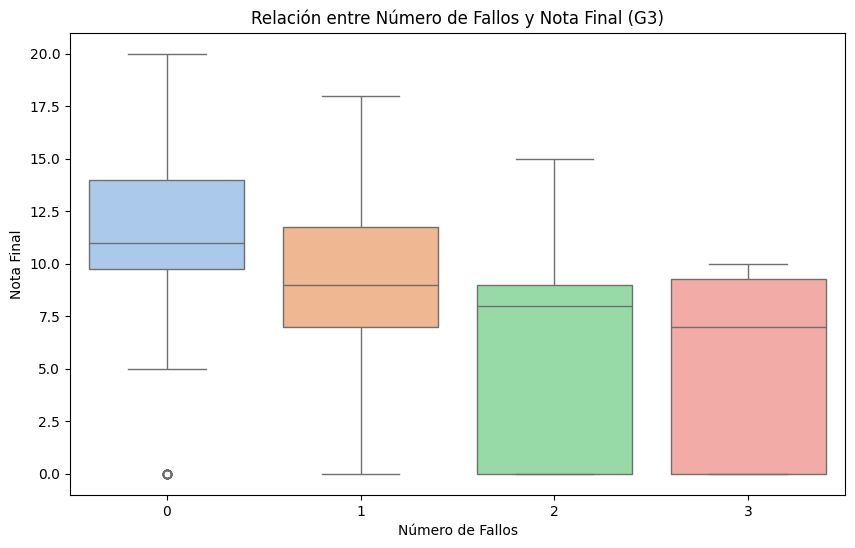

/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_23368/2667571711.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='pastel')


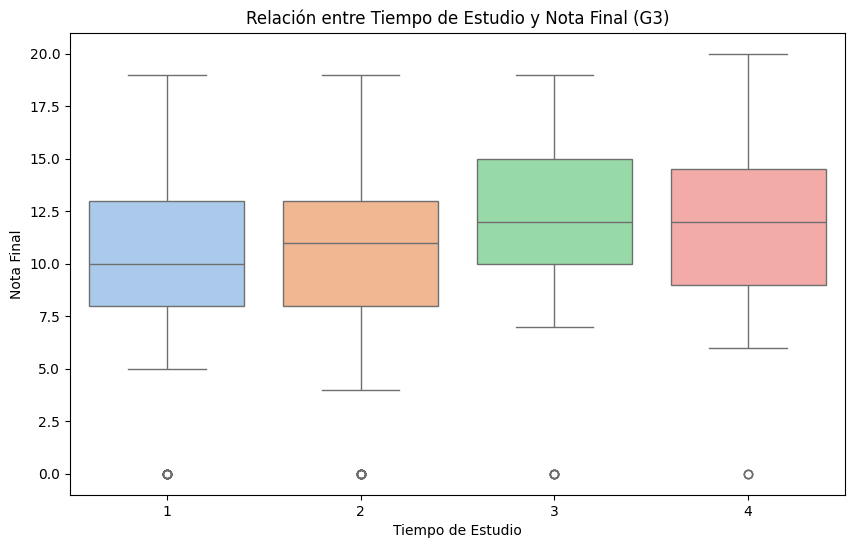

/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_23368/2667571711.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Walc', y='G3', data=df, palette='pastel')


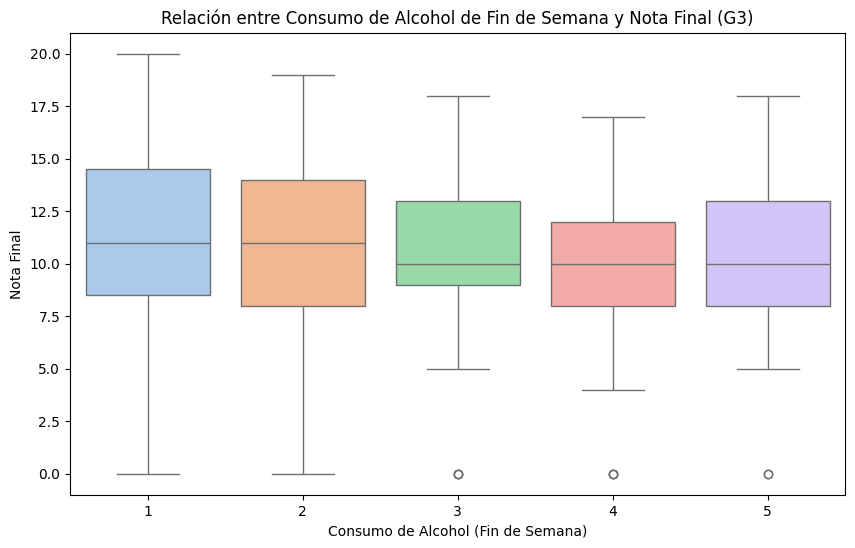

In [31]:
# Relación entre el número de fallos previos y G3
plt.figure(figsize=(10, 6))
sns.boxplot(x='failures', y='G3', data=df, palette='pastel')
plt.title('Relación entre Número de Fallos y Nota Final (G3)')
plt.xlabel('Número de Fallos')
plt.ylabel('Nota Final')
plt.show()

# Relación entre tiempo de estudio y G3
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=df, palette='pastel')
plt.title('Relación entre Tiempo de Estudio y Nota Final (G3)')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Nota Final')
plt.show()

# Relación entre consumo de alcohol y G3
plt.figure(figsize=(10, 6))
sns.boxplot(x='Walc', y='G3', data=df, palette='pastel')
plt.title('Relación entre Consumo de Alcohol de Fin de Semana y Nota Final (G3)')
plt.xlabel('Consumo de Alcohol (Fin de Semana)')
plt.ylabel('Nota Final')
plt.show()


In [35]:
# Matriz de correlación enfocada en G3
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Mapa de Correlaciones entre Variables')
plt.show()

# Variables más correlacionadas con G3
print("Variables más correlacionadas con G3:")
correlated_features = correlation_matrix['G3'].sort_values(ascending=False)
print(correlated_features)


ValueError: could not convert string to float: 'mother'